In [57]:
# Add Matplotlib inline magic command
%matplotlib inline
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

In [3]:
# Reading the files and creating df

city_df=pd.read_csv("Resources/city_data.csv")
ride_df=pd.read_csv("Resources/ride_data.csv")

In [5]:
# Inspect city_df
# Rows with null value
city_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
# Inspect city_df
# Check datatype
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# Inspect city_df
# No of cities for each type
city_df.groupby("type").count()

,city,driver_count
type,,
Rural,18,18
Suburban,36,36
Urban,66,66


In [11]:
# Inspect ride df
# Counting empty rows
ride_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
# Inspect ride df
# Datatype
ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
# Merge the dataframes
pyber_data_df=pd.merge(ride_df,city_df,how="left",on="city")
pyber_data_df.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

In [19]:
# Create urban city df
urban_city_df=pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_city_df.tail()

,city,date,fare,ride_id,driver_count,type
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban
1624,West Gabriel,2019-05-05 01:24:06,27.57,4428773411209,57,Urban


In [20]:
# Create suburban city df
suburban_city_df=pyber_data_df[pyber_data_df["type"]=="Suburban"]
suburban_city_df.tail()

,city,date,fare,ride_id,driver_count,type
2245,West Hannah,2019-03-02 17:06:03,13.92,7388937249208,12,Suburban
2246,Lake Robertside,2019-04-03 03:27:45,12.76,1301757653884,4,Suburban
2247,Colemanland,2019-01-10 06:49:58,27.70,8704067171414,23,Suburban
2248,East Marymouth,2019-02-12 23:18:53,47.41,7409660239158,5,Suburban
2249,New Raymond,2019-02-11 17:28:27,17.97,7551674475043,17,Suburban


In [22]:
# Create rural city df
rural_city_df=pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_city_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [23]:
# Calculate ride count
urban_ride_count=urban_city_df.groupby("city").count()["ride_id"]
suburban_ride_count=suburban_city_df.groupby("city").count()["ride_id"]
rural_ride_count=rural_city_df.groupby("city").count()["ride_id"]

In [24]:
# Calculate average fare
urban_avg_fare=urban_city_df.groupby("city").mean()["fare"]
suburban_avg_fare=suburban_city_df.groupby("city").mean()["fare"]
rural_avg_fare=rural_city_df.groupby("city").mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [25]:
# Calculate average driver count
urban_driver_count=urban_city_df.groupby("city").mean()["driver_count"]
suburban_driver_count=suburban_city_df.groupby("city").mean()["driver_count"]
rural_driver_count=rural_city_df.groupby("city").mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

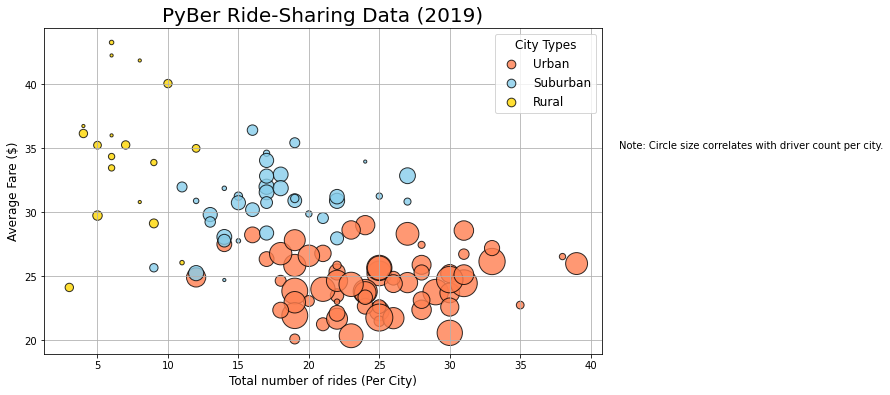

In [49]:
plt.figure(figsize=(10,6))

# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, urban_avg_fare,s=10*urban_driver_count, color="coral",
            label="Urban",edgecolors="black",alpha=0.8,linewidths=1)

# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count, suburban_avg_fare,s=10*suburban_driver_count, color="skyblue",
            label="Suburban",edgecolors="black",alpha=0.8,linewidths=1)

# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count, rural_avg_fare,s=10*rural_driver_count, color="gold",
            label="Rural",edgecolors="black",alpha=0.8,linewidths=1)

plt.xlabel("Total number of rides (Per City)",fontsize=12)
plt.ylabel("Average Fare ($)",fontsize=12)
plt.title("PyBer Ride-Sharing Data (2019)",fontsize=20)
plt.grid()

# Create legend
lgnd=plt.legend(fontsize=12,mode="Expanded",scatterpoints=1,loc="best",title="City Types")
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]
lgnd.get_title().set_fontsize(12)

# Add note to describe circle size
plt.text(42,35,"Note: Circle size correlates with driver count per city.")

#Save the figure
plt.savefig("analysis/fig1.png")

plt.show()

In [50]:
# Get Summary Statistics

urban_ride_count.describe()


count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [51]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [52]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [53]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [54]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [55]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [56]:
# Calculate the mode of the ride count for the suburban cities.
suburban_ride_count.mode()

0    17
dtype: int64

In [61]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [62]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [63]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [65]:
# Get the fares for the urban cities.
urban_fares = urban_city_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [66]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [69]:
# Get the fares
suburban_fares = suburban_city_df["fare"]

# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [70]:
# Get the fares
rural_fares = rural_city_df["fare"]

# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [73]:
# Get the driver count
urban_driver_count=urban_city_df["driver_count"]

# Calculate the measures of central tendency for the driver count for urban cities
mean_urban_driver_count = np.mean(urban_driver_count)
print(f"The mean driver count for urban trips is {mean_urban_driver_count:.2f}.")
median_urban_driver_count = np.median(urban_driver_count)
print(f"The median driver count for urban trips is {median_urban_driver_count:.2f}.")
mode_urban_driver_count = sts.mode(urban_driver_count)
print(f"The mode driver count for urban trips is {mode_urban_driver_count}.")

The mean driver count for urban trips is 36.68.
The median driver count for urban trips is 37.00.
The mode driver count for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [74]:
# Get the driver count
suburban_driver_count=suburban_city_df["driver_count"]

# Calculate the measures of central tendency for the driver count for suburban cities
mean_suburban_driver_count = np.mean(suburban_driver_count)
print(f"The mean driver count for suburban trips is {mean_suburban_driver_count:.2f}.")
median_suburban_driver_count = np.median(suburban_driver_count)
print(f"The median driver count for suburban trips is {median_suburban_driver_count:.2f}.")
mode_suburban_driver_count = sts.mode(suburban_driver_count)
print(f"The mode driver count for suburban trips is {mode_suburban_driver_count}.")

The mean driver count for suburban trips is 13.71.
The median driver count for suburban trips is 16.00.
The mode driver count for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [75]:
# Get the driver count
rural_driver_count=rural_city_df["driver_count"]

# Calculate the measures of central tendency for the driver count for rural cities
mean_rural_driver_count = np.mean(rural_driver_count)
print(f"The mean driver count for rural trips is {mean_rural_driver_count:.2f}.")
median_rural_driver_count = np.median(rural_driver_count)
print(f"The median driver count for rural trips is {median_rural_driver_count:.2f}.")
mode_rural_driver_count = sts.mode(rural_driver_count)
print(f"The mode driver count for rural trips is {mode_rural_driver_count}.")

The mean driver count for rural trips is 4.30.
The median driver count for rural trips is 4.00.
The mode driver count for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


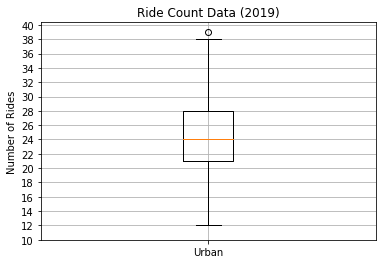

In [78]:
# Box plot for ride data - Urban
x_labels=["Urban"]
fig,ax=plt.subplots()
ax.boxplot(urban_ride_count,labels=x_labels)
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,41,step=2))
ax.grid()
plt.show()

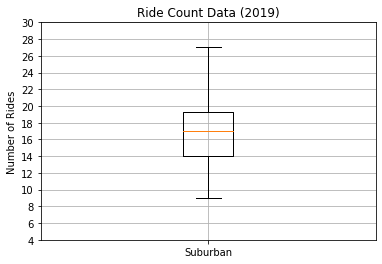

In [94]:
# Box plot for ride data - Suburban
x_labels=["Suburban"]
fig,ax=plt.subplots()
ax.boxplot(suburban_ride_count,labels=x_labels)
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(4,31,step=2))
ax.grid()
plt.show()

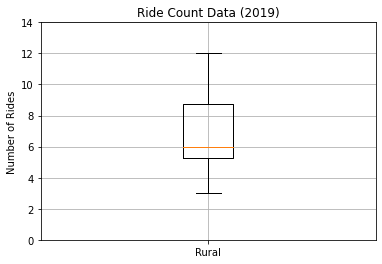

In [95]:
# Box plot for ride data - Rural
x_labels=["Rural"]
fig,ax=plt.subplots()
ax.boxplot(rural_ride_count,labels=x_labels)
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0,15,step=2))
ax.grid()
plt.show()

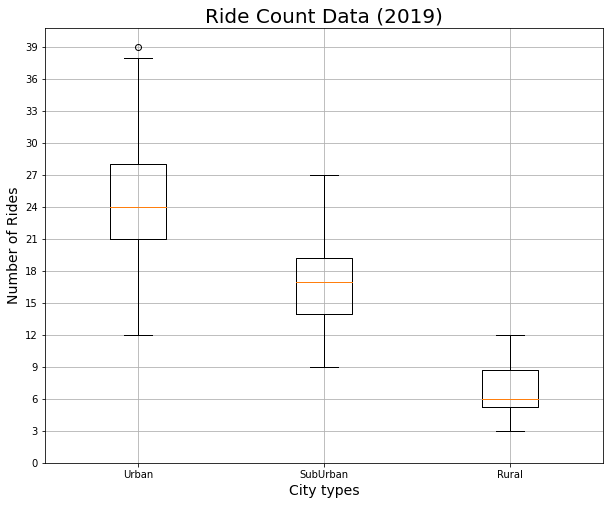

In [82]:
# Box plot for ride data - Combined
x_labels=["Urban","SubUrban","Rural"]
ride_count_list=[urban_ride_count,suburban_ride_count,rural_ride_count]
fig,ax=plt.subplots(figsize=(10,8))
ax.boxplot(ride_count_list,labels=x_labels)
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel('City types', fontsize=14)
ax.set_yticks(np.arange(0,42,step=3))
ax.grid()

# Save the figure
plt.savefig('analysis/fig2.png')
plt.show()

In [89]:
# Urban city outlier
urban_city_outlier=urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count and is a outlier")

West Angela has the highest rider count and is a outlier


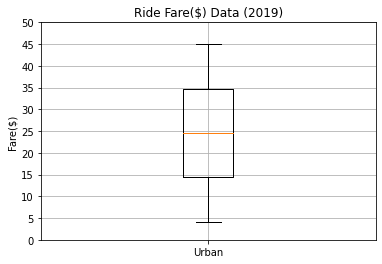

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [103]:
# Box plot for fare data - Urban
x_labels=["Urban"]
fig,ax=plt.subplots()
ax.boxplot(urban_fares,labels=x_labels)
ax.set_title('Ride Fare($) Data (2019)')
ax.set_ylabel('Fare($)')
ax.set_yticks(np.arange(0,51,step=5))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

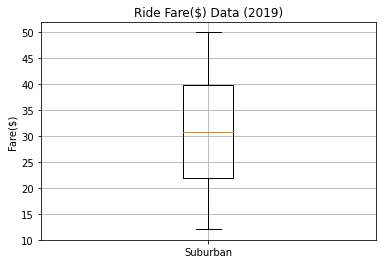

In [106]:
# Box plot for fare data - Suburban
x_labels=["Suburban"]
fig,ax=plt.subplots()
ax.boxplot(suburban_fares,labels=x_labels)
ax.set_title('Ride Fare($) Data (2019)')
ax.set_ylabel('Fare($)')
ax.set_yticks(np.arange(10,51,step=5))
ax.grid()
plt.show()

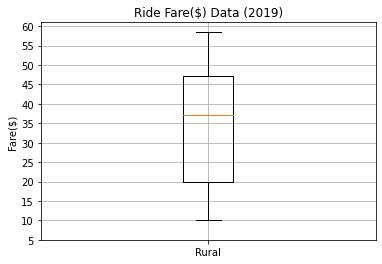

In [108]:
# Box plot for fare data - Rural
x_labels=["Rural"]
fig,ax=plt.subplots()
ax.boxplot(rural_fares,labels=x_labels)
ax.set_title('Ride Fare($) Data (2019)')
ax.set_ylabel('Fare($)')
ax.set_yticks(np.arange(5,61,step=5))
ax.grid()
plt.show()

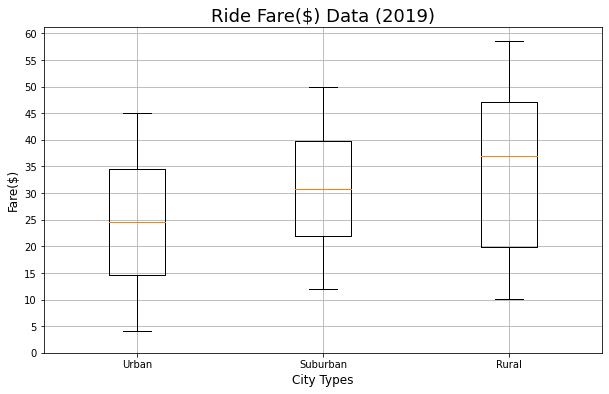

In [114]:
# Box plot for fare data - Combined
x_labels=["Urban","Suburban","Rural"]
fare_list=[urban_fares,suburban_fares,rural_fares]
fig,ax=plt.subplots(figsize=(10,6))
ax.boxplot(fare_list,labels=x_labels)
ax.set_title('Ride Fare($) Data (2019)',fontsize=18)
ax.set_ylabel('Fare($)',fontsize=12)
ax.set_xlabel("City Types",fontsize=12)
ax.set_yticks(np.arange(0,61,step=5))
ax.grid()
plt.show()

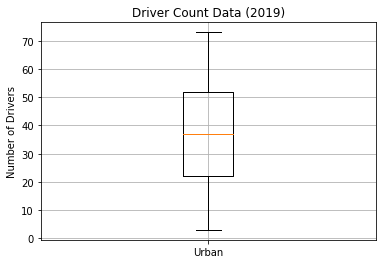

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [121]:
# Box plot for rider data - Urban
x_labels=["Urban"]
fig,ax=plt.subplots()
ax.boxplot(urban_driver_count,labels=x_labels)
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0,75,step=10))
ax.grid()
plt.show()
print("Summary Statistics")
urban_driver_count.describe()

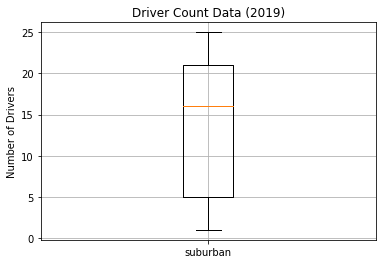

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [122]:
# Box plot for rider data - Suburban
x_labels=["suburban"]
fig,ax=plt.subplots()
ax.boxplot(suburban_driver_count,labels=x_labels)
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0,30,step=5))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_driver_count.describe()

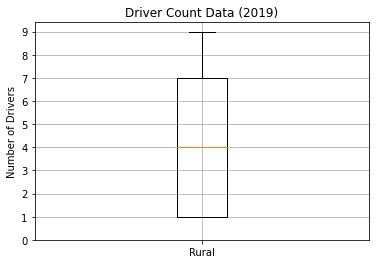

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [125]:
# Box plot for rider data - Urban
x_labels=["Rural"]
fig,ax=plt.subplots()
ax.boxplot(rural_driver_count,labels=x_labels)
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0,10,step=1))
ax.grid()
plt.show()
print("Summary Statistics")
rural_driver_count.describe()

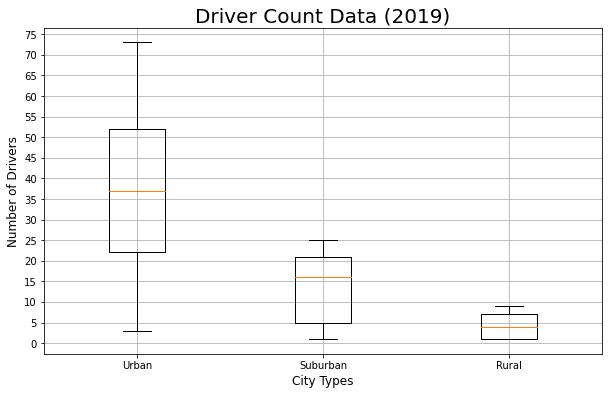

In [127]:
# Box plot for rider data - Combined
x_labels=["Urban","Suburban","Rural"]
driver_count_list=[urban_driver_count,suburban_driver_count,rural_driver_count]
fig,ax=plt.subplots(figsize=(10,6))
ax.boxplot(driver_count_list,labels=x_labels)
ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Drivers', fontsize=12)
ax.set_xlabel('City Types', fontsize=12)
ax.set_yticks(np.arange(0,76,step=5))
ax.grid()
plt.savefig('analysis/fig3.png')
plt.show()
